## Example of working with mapping data

Load the mapping boundaries into Geopandas and plot. 

Geography boundaries (UTLA) in shape file format are available from ONS: https://geoportal.statistics.gov.uk/datasets/counties-and-unitary-authorities-december-2019-boundaries-uk-bfc

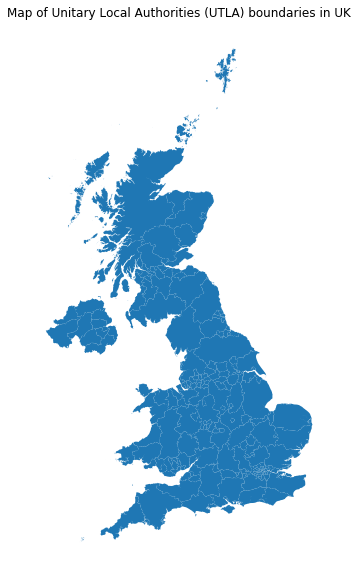

In [3]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

path = './data/Counties_and_Unitary_Authorities_December_2019_Boundaries_UK_BFC/Counties_and_Unitary_Authorities_December_2019_Boundaries_UK_BFC.shp'
utla_boundaries = gpd.read_file(path)

f, ax = plt.subplots(1, figsize=(10, 10))
ax = utla_boundaries.plot(ax=ax)
ax.set_title('Map of Unitary Local Authorities (UTLA) boundaries in UK')
ax.set_axis_off()
plt.show()

In [4]:
utla_boundaries.columns

Index(['objectid', 'ctyua19cd', 'ctyua19nm', 'ctyua19nmw', 'bng_e', 'bng_n',
       'long', 'lat', 'st_areasha', 'st_lengths', 'geometry'],
      dtype='object')

In [5]:
utla_boundaries.head()

,objectid,ctyua19cd,ctyua19nm,ctyua19nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447160,531474,-1.27018,54.676140,9.371262e+07,71011.933949,"MULTIPOLYGON (((447213.900 537036.104, 447228...."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.388156e+07,44481.691242,"MULTIPOLYGON (((448609.900 521982.600, 448616...."
2,3,E06000003,Redcar and Cleveland,None,464361,519597,-1.00608,54.567520,2.450695e+08,96703.989701,"MULTIPOLYGON (((455932.335 527880.697, 455919...."
3,4,E06000004,Stockton-on-Tees,None,444940,518183,-1.30664,54.556911,2.049330e+08,123408.985928,"MULTIPOLYGON (((444157.002 527956.304, 444165...."
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.535339,1.974757e+08,107206.401677,"POLYGON ((423496.602 524724.299, 423497.204 52..."


## 

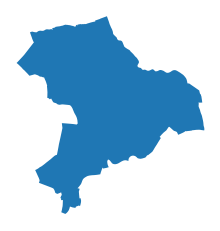

In [13]:
hackney = utla_boundaries[utla_boundaries.ctyua19nm == 'Hackney']
ax = hackney.plot()
ax.set_axis_off()
plt.show()

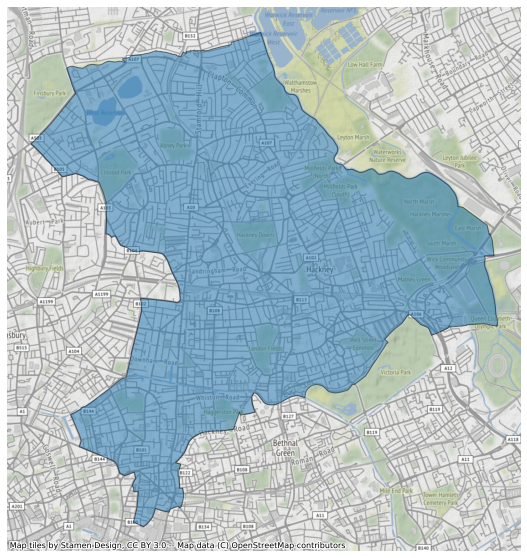

In [18]:
import contextily as ctx

hackney = hackney.to_crs(epsg=3857)

ax = hackney.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_axis_off()
ctx.add_basemap(ax)